## **LetsStart**

💪


## **Intermediate level task :**

## **Task 4 : Exploratory Data Analysis- Terrorism**

## **AUTHOR ✍ : ZINEB BOUGRICHE**

## **Dataset:**
https://bit.ly/2TK5Xn5

In [2]:
# Importing packages
import pandas as pd
import numpy as np

# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

path = '/content/drive/My Drive/test/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from zipfile import ZipFile 

In [ ]:
with ZipFile('drive/MyDrive/Global Terrorism - START data.zip','r') as zipObj:
  zipObj.extractall('drive/MyDrive/test')


In [4]:
df = pd.read_csv(path + 'globalterrorismdb_0718dist.csv',encoding='latin1')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
df.rename(columns={'eventid':'Event_ID','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state'
                             ,'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                             'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',
                             'motive':'Motive','success':'Success','suicide':'suicide','weapdetail':'weapdetail'},inplace=True)


In [8]:
df

,Event_ID,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [9]:
df.isnull().sum()

Event_ID           0
Year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [10]:
df = df[['Event_ID','Year','Month','Day','Country','Region','region','state','latitude','longitude','Success','AttackType','attacktype1'
               ,'Target_type','targtype1','Target','natlty1_txt','Killed','Wounded','Motive','city','Weapon_type','Group','suicide','weapdetail']]
df.head()

,Event_ID,Year,Month,Day,Country,Region,region,state,latitude,longitude,...,Target,natlty1_txt,Killed,Wounded,Motive,city,Weapon_type,Group,suicide,weapdetail
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,2,NaN,18.456792,-69.951164,...,Julio Guzman,Dominican Republic,1.0,0.0,NaN,Santo Domingo,Unknown,MANO-D,0,NaN
1,197000000002,1970,0,0,Mexico,North America,1,Federal,19.371887,-99.086624,...,"Nadine Chaval, daughter",Belgium,0.0,0.0,NaN,Mexico city,Unknown,23rd of September Communist League,0,NaN
2,197001000001,1970,1,0,Philippines,Southeast Asia,5,Tarlac,15.478598,120.599741,...,Employee,United States,1.0,0.0,NaN,Unknown,Unknown,Unknown,0,NaN
3,197001000002,1970,1,0,Greece,Western Europe,8,Attica,37.997490,23.762728,...,U.S. Embassy,United States,NaN,NaN,NaN,Athens,Explosives,Unknown,0,Explosive
4,197001000003,1970,1,0,Japan,East Asia,4,Fukouka,33.580412,130.396361,...,U.S. Consulate,United States,NaN,NaN,NaN,Fukouka,Incendiary,Unknown,0,Incendiary


In [11]:
df.shape

(181691, 25)

In [12]:
df.columns

Index(['Event_ID', 'Year', 'Month', 'Day', 'Country', 'Region', 'region',
       'state', 'latitude', 'longitude', 'Success', 'AttackType',
       'attacktype1', 'Target_type', 'targtype1', 'Target', 'natlty1_txt',
       'Killed', 'Wounded', 'Motive', 'city', 'Weapon_type', 'Group',
       'suicide', 'weapdetail'],
      dtype='object')

In [13]:
df.describe()

,Event_ID,Year,Month,Day,region,latitude,longitude,Success,attacktype1,targtype1,Killed,Wounded,suicide
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,7.160938,23.498343,-4.586957e+02,0.889598,3.247547,8.439719,2.403272,3.167668,0.036507
std,1.325957e+09,13.259430,3.388303,8.814045,2.933408,18.569242,2.047790e+05,0.313391,1.915772,6.653838,11.545741,35.949392,0.187549
min,1.970000e+11,1970.000000,0.000000,0.000000,1.000000,-53.154613,-8.618590e+07,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,5.000000,11.510046,4.545640e+00,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,6.000000,31.467463,4.324651e+01,1.000000,3.000000,4.000000,0.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,10.000000,34.685087,6.871033e+01,1.000000,3.000000,14.000000,2.000000,2.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,12.000000,74.633553,1.793667e+02,1.000000,9.000000,22.000000,1570.000000,8191.000000,1.000000


**How many attacks are there each year?**

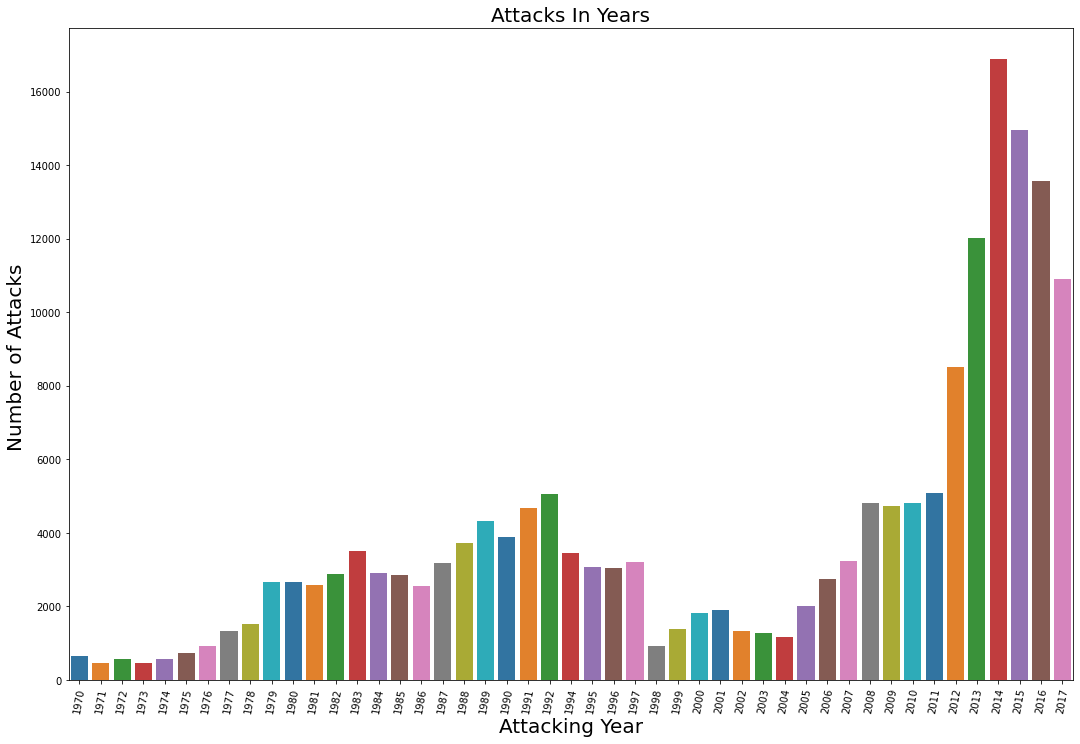

In [16]:
years_count = df['Year'].value_counts(dropna = False).sort_index()
year = df['Year'].unique()
plt.figure(figsize = (18,12))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 80)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks ',fontsize=20)
plt.title('Attacks In Years',fontsize=20)
plt.show()

**Conclusion : Year 2014 has had the maximum terror attacks**

**How many attacks per side each year?**

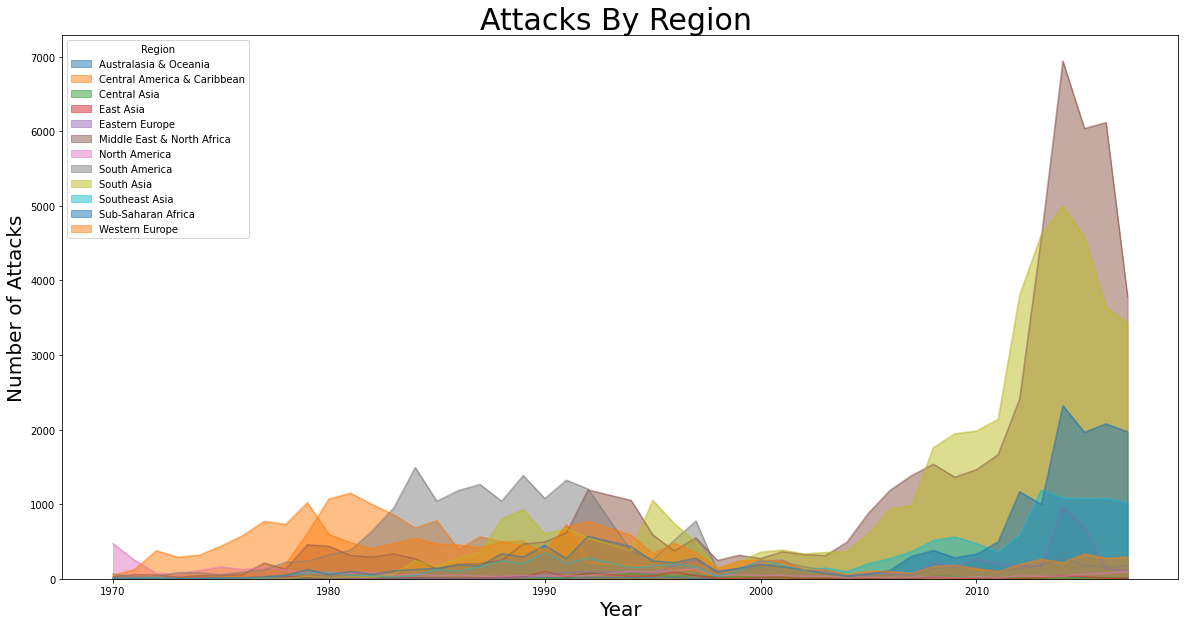

In [17]:
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Attacks By Region ',fontsize=30)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

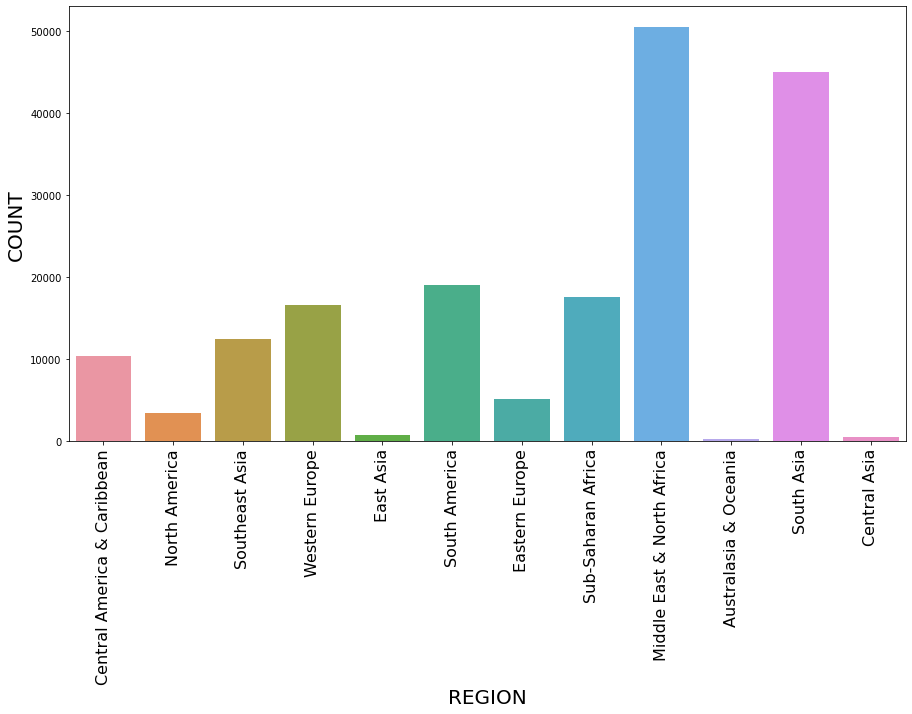

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x='Region') 
plt.xticks(size = 16,rotation=90) 
plt.xlabel("REGION",size=20) 
plt.ylabel("COUNT",size=20) 
plt.show()

**Conclusion- The region "Middle East & North Africa" has had the maximum terror attacks followed by South Asia**

**Top 3 Countries Affected By Terrorism**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


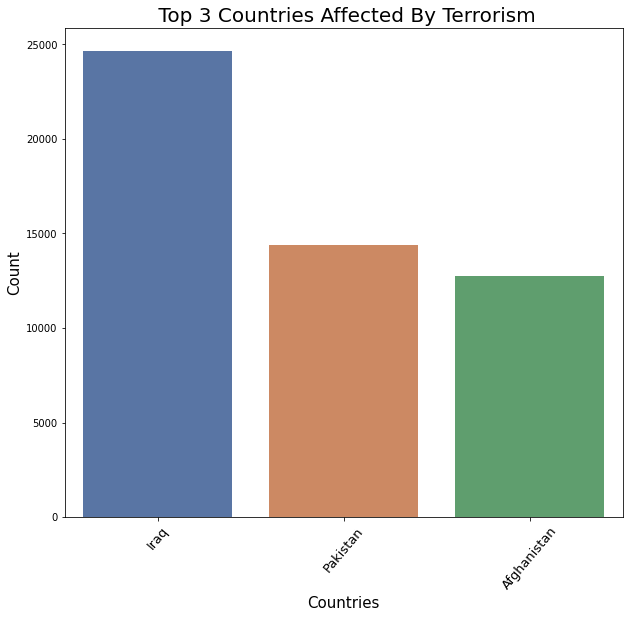

In [21]:
plt.figure(figsize=(10,9))
x = df['Country'].value_counts().index[:3]
y = df['Country'].value_counts().values[:3]
sns.barplot(x,y,palette='deep')
plt.title(' Top 3 Countries Affected By Terrorism',size=20)
plt.xlabel('Countries',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=13,rotation= 50)
plt.show()

**Conclusion :The country affected the most is Iraq**

**The number of suicides bombings per year**

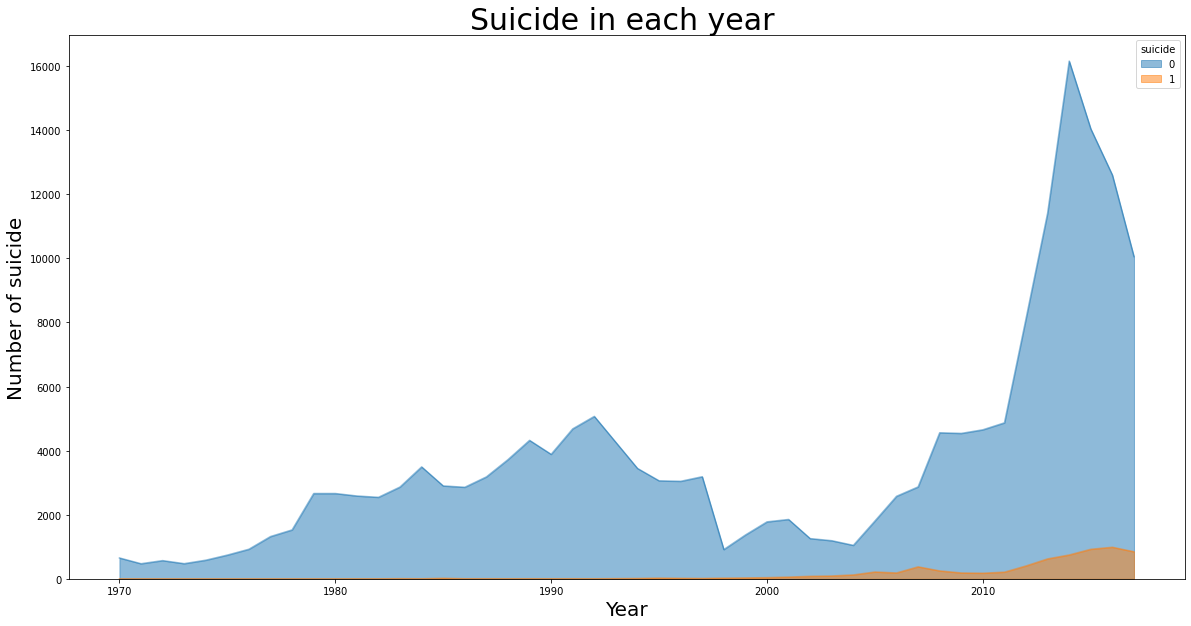

In [24]:
pd.crosstab(df.Year, df.suicide).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Suicide in each year ',fontsize=30)
plt.ylabel('Number of suicide',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

**Most types of weapons used**

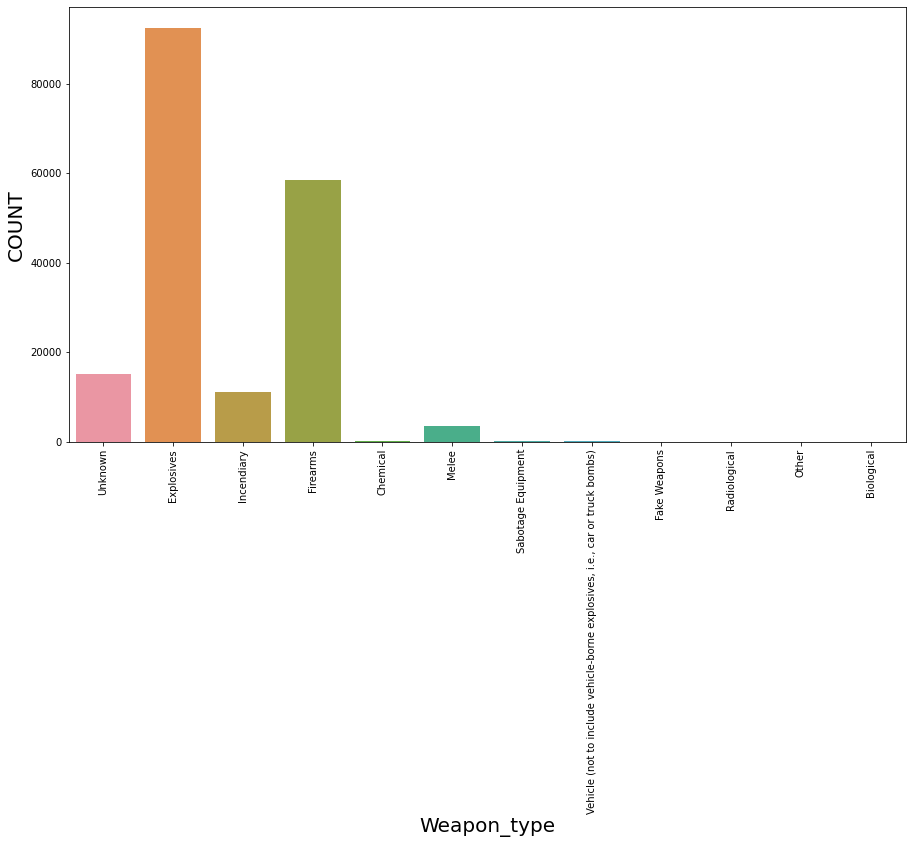

In [29]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x='Weapon_type') 
plt.xticks(size = 10,rotation=90) 
plt.xlabel("Weapon_type",size=20) 
plt.ylabel("COUNT",size=20) 
plt.show()

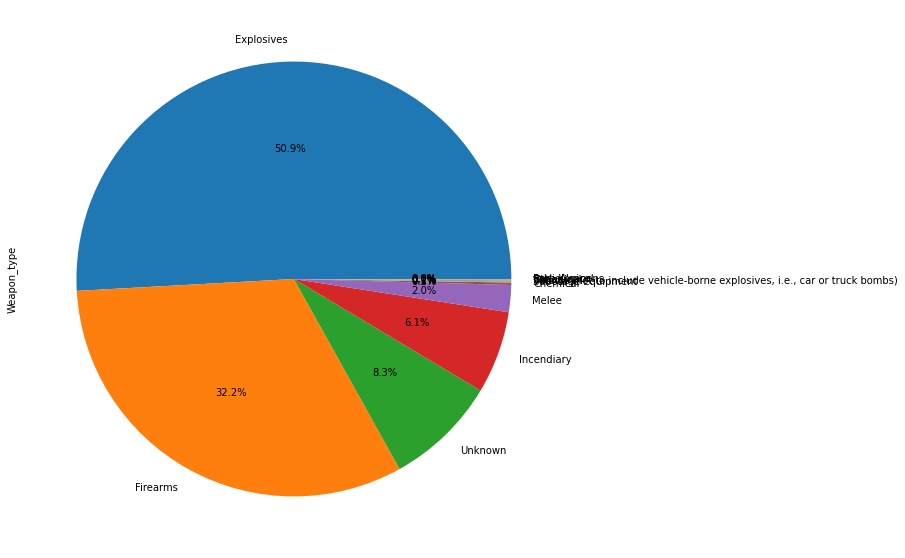

In [30]:
plt.figure(figsize=(10,10))
df['Weapon_type'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()

**Conclusion: Most types of weapons used explosives followed by firearms**

**The number of dead according to the type of each attack**

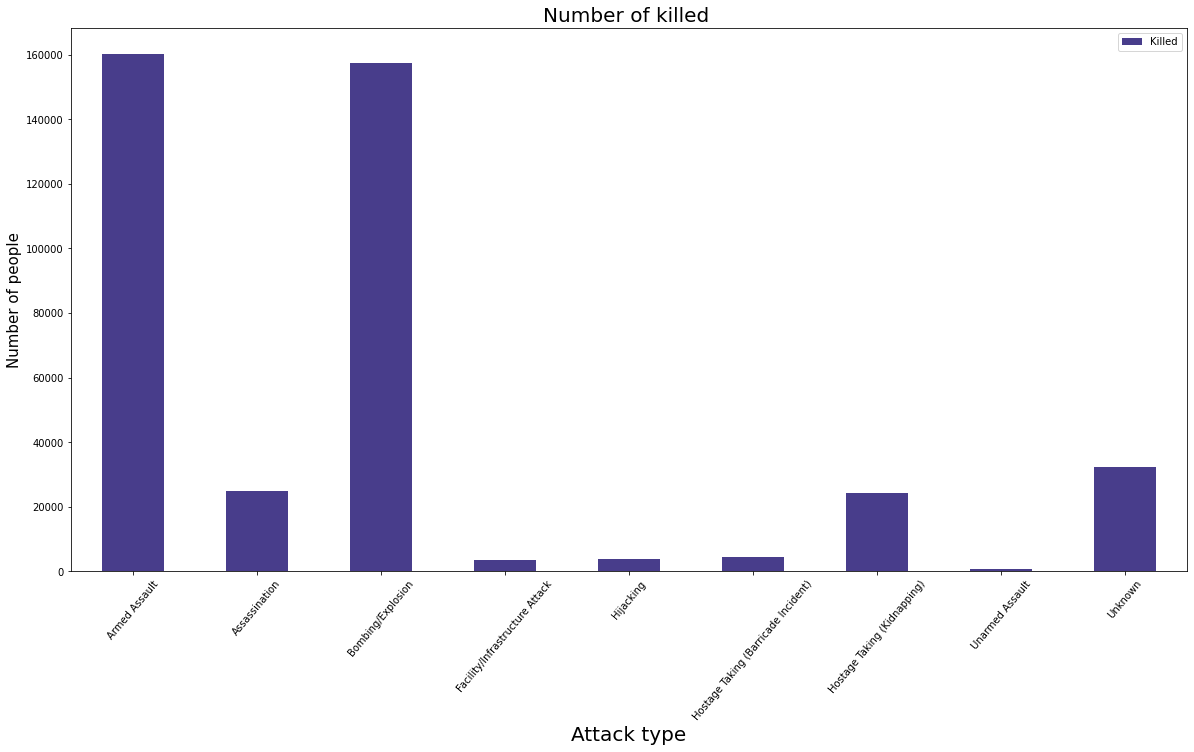

In [42]:
df[['AttackType','Killed']].groupby(["AttackType"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkslateblue'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=20)
plt.show()

**Top 10 Terrorist groups**

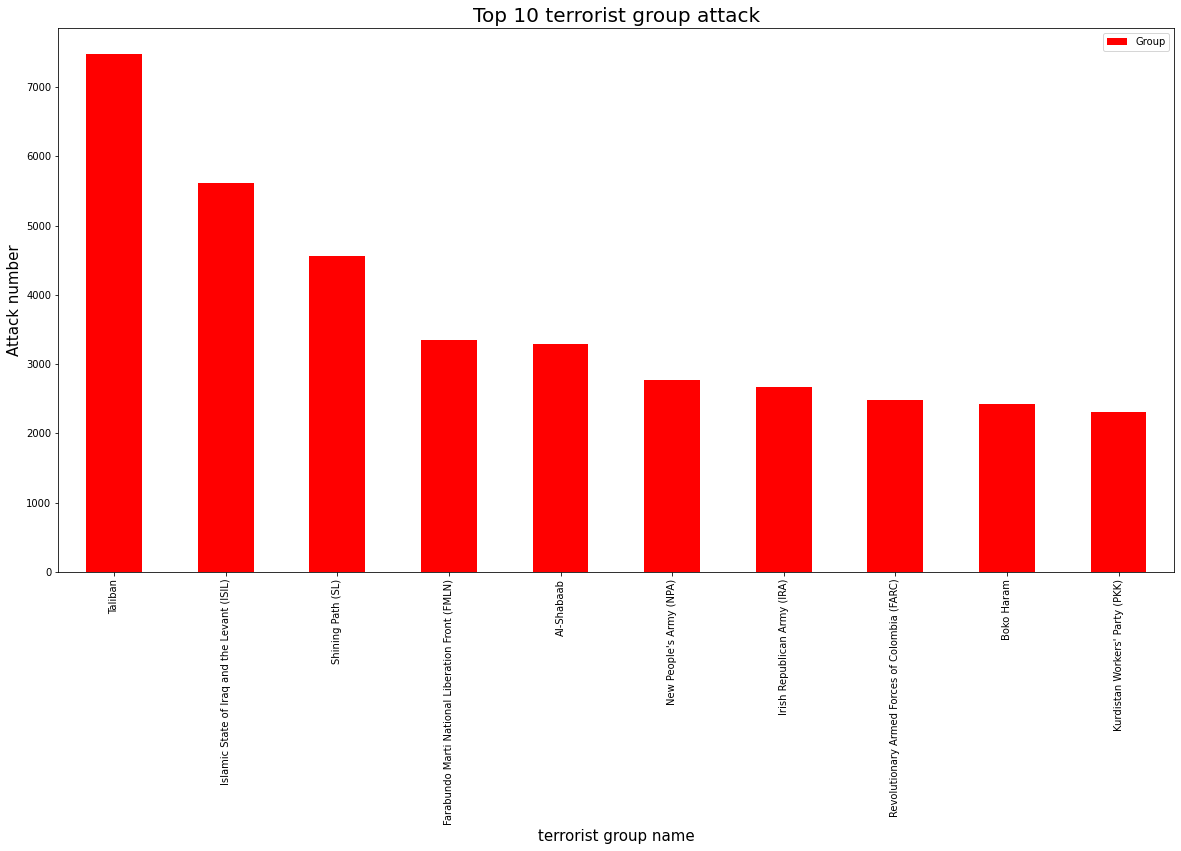

In [43]:
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='red',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

**Conclusion :Taliban has carried out maximum attacks**